In [1]:
#importing all necessary libraries
import os
import re

#importing libraries needed for data analysis
import numpy as np
import pandas as pd

#importing libraries needed for data visualization
import matplotlib.pyplot as plt

#libraries used for analysing images
import skimage.io
import skimage.feature
import skimage.transform
from glob import glob

# Loading the data

In [2]:
#extract the data from the folder
folders = os.listdir('./Data')

In [3]:
folders

['test', 'train']

In [4]:
glob('./data/train/{}/*.jpg'.format('PNEUMONIA'))

['./data/train/PNEUMONIA\\PNEUMONIA(0).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(10).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(100).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1000).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1001).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1002).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1003).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1004).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1005).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1006).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1007).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1008).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1009).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(101).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1010).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1011).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1012).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1013).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1014).jpg',
 './data/train/PNEUMONIA\\PNEUMONIA(1015).jpg',
 '

In [5]:
glob('./data/train/{}/*.jpg'.format('COVID19'))

['./data/train/COVID19\\COVID19(0).jpg',
 './data/train/COVID19\\COVID19(1).jpg',
 './data/train/COVID19\\COVID19(10).jpg',
 './data/train/COVID19\\COVID19(100).jpg',
 './data/train/COVID19\\COVID19(101).jpg',
 './data/train/COVID19\\COVID19(102).jpg',
 './data/train/COVID19\\COVID19(103).jpg',
 './data/train/COVID19\\COVID19(104).jpg',
 './data/train/COVID19\\COVID19(105).jpg',
 './data/train/COVID19\\COVID19(106).jpg',
 './data/train/COVID19\\COVID19(107).jpg',
 './data/train/COVID19\\COVID19(108).jpg',
 './data/train/COVID19\\COVID19(109).jpg',
 './data/train/COVID19\\COVID19(11).jpg',
 './data/train/COVID19\\COVID19(110).jpg',
 './data/train/COVID19\\COVID19(111).jpg',
 './data/train/COVID19\\COVID19(112).jpg',
 './data/train/COVID19\\COVID19(113).jpg',
 './data/train/COVID19\\COVID19(114).jpg',
 './data/train/COVID19\\COVID19(115).jpg',
 './data/train/COVID19\\COVID19(116).jpg',
 './data/train/COVID19\\COVID19(117).jpg',
 './data/train/COVID19\\COVID19(118).jpg',
 './data/train/CO

In [6]:
glob('./data/train/{}/*.jpg'.format('NORMAL'))

['./data/train/NORMAL\\NORMAL(0).jpg',
 './data/train/NORMAL\\NORMAL(1).jpg',
 './data/train/NORMAL\\NORMAL(10).jpg',
 './data/train/NORMAL\\NORMAL(100).jpg',
 './data/train/NORMAL\\NORMAL(1000).jpg',
 './data/train/NORMAL\\NORMAL(1001).jpg',
 './data/train/NORMAL\\NORMAL(1002).jpg',
 './data/train/NORMAL\\NORMAL(1003).jpg',
 './data/train/NORMAL\\NORMAL(1004).jpg',
 './data/train/NORMAL\\NORMAL(1005).jpg',
 './data/train/NORMAL\\NORMAL(1006).jpg',
 './data/train/NORMAL\\NORMAL(1007).jpg',
 './data/train/NORMAL\\NORMAL(1008).jpg',
 './data/train/NORMAL\\NORMAL(1009).jpg',
 './data/train/NORMAL\\NORMAL(101).jpg',
 './data/train/NORMAL\\NORMAL(1010).jpg',
 './data/train/NORMAL\\NORMAL(1011).jpg',
 './data/train/NORMAL\\NORMAL(1012).jpg',
 './data/train/NORMAL\\NORMAL(1013).jpg',
 './data/train/NORMAL\\NORMAL(1014).jpg',
 './data/train/NORMAL\\NORMAL(1015).jpg',
 './data/train/NORMAL\\NORMAL(1016).jpg',
 './data/train/NORMAL\\NORMAL(1017).jpg',
 './data/train/NORMAL\\NORMAL(1018).jpg',
 '

In [7]:
train_direc = "./Data/train"
test_direc = "./Data/test"

In [8]:
print(os.listdir(train_direc))

['COVID19', 'NORMAL', 'PNEUMONIA']


In [9]:
print(os.listdir(test_direc))

['COVID19', 'NORMAL', 'PNEUMONIA']


**Identify number of images in train and test folder**

In [10]:
len(os.listdir(train_direc+"/COVID19"))

460

In [11]:
len(os.listdir(train_direc+"/NORMAL"))

1266

In [12]:
len(os.listdir(train_direc+"/PNEUMONIA"))

3418

In [13]:
len(os.listdir(test_direc+"/COVID19"))

116

In [14]:
len(os.listdir(test_direc+"/NORMAL"))

317

In [15]:
len(os.listdir(test_direc+"/PNEUMONIA"))

855

# **Data Cleaning**

In [16]:
img_size = (250,250)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./225, 
                                   samplewise_center = True,
                                   samplewise_std_normalization = True,
                                   rotation_range = 0,
                                   horizontal_flip = True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./225)

train_generator = train_datagen.flow_from_directory(train_direc,
                                                    target_size = img_size,
                                                    batch_size = 32,
                                                    shuffle = True,
                                                    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_direc,
                                                    target_size = img_size,
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle = False)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [19]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

# Model Building- AlexNet

In [20]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, BatchNormalization,UpSampling2D,GlobalAveragePooling2D,Dropout,Activation
from keras.models import Sequential
from keras.callbacks import EarlyStopping,LearningRateScheduler

import tensorflow as tf

In [21]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(250,250,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

In [22]:
model.summary()
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 384)       8

In [23]:
#supress the warnings
import warnings
warnings.filterwarnings('ignore')

import time
t = time.time()
train_model = model.fit_generator(train_generator,steps_per_epoch=5,epochs=25,validation_data=test_generator)
print('Training time: %s' % (time.time()-t))

Epoch 1/25
5/5 [==============================] - 64s 15s/step - loss: 48.3691 - accuracy: 0.4875 - val_loss: 118.8719 - val_accuracy: 0.2461
Epoch 2/25
5/5 [==============================] - 58s 14s/step - loss: 9.0804 - accuracy: 0.6687 - val_loss: 229.2913 - val_accuracy: 0.6638
Epoch 3/25
5/5 [==============================] - 59s 14s/step - loss: 5.4923 - accuracy: 0.7000 - val_loss: 867.7063 - val_accuracy: 0.2461
Epoch 4/25
5/5 [==============================] - 53s 13s/step - loss: 4.3512 - accuracy: 0.7125 - val_loss: 357.8663 - val_accuracy: 0.6638
Epoch 5/25
5/5 [==============================] - 54s 13s/step - loss: 1.8635 - accuracy: 0.7625 - val_loss: 369.0010 - val_accuracy: 0.6638
Epoch 6/25
5/5 [==============================] - 54s 13s/step - loss: 2.2676 - accuracy: 0.7500 - val_loss: 180.0242 - val_accuracy: 0.6638
Epoch 7/25
5/5 [==============================] - 55s 13s/step - loss: 1.6158 - accuracy: 0.8125 - val_loss: 141.4645 - val_accuracy: 0.6638
Epoch 8/25
5

In [24]:
def plot_losses_and_accuracies(train_model,x):
    epochs = [i for i in range(x)]
    fig , ax = plt.subplots(1,2)
    train_acc = train_model.history['accuracy']
    train_loss = train_model.history['loss']
    val_acc = train_model.history['val_accuracy']
    val_loss = train_model.history['val_loss']
    fig.set_size_inches(25,10)
    ax[0].plot(epochs , train_acc , 'bo-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'go-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'b-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

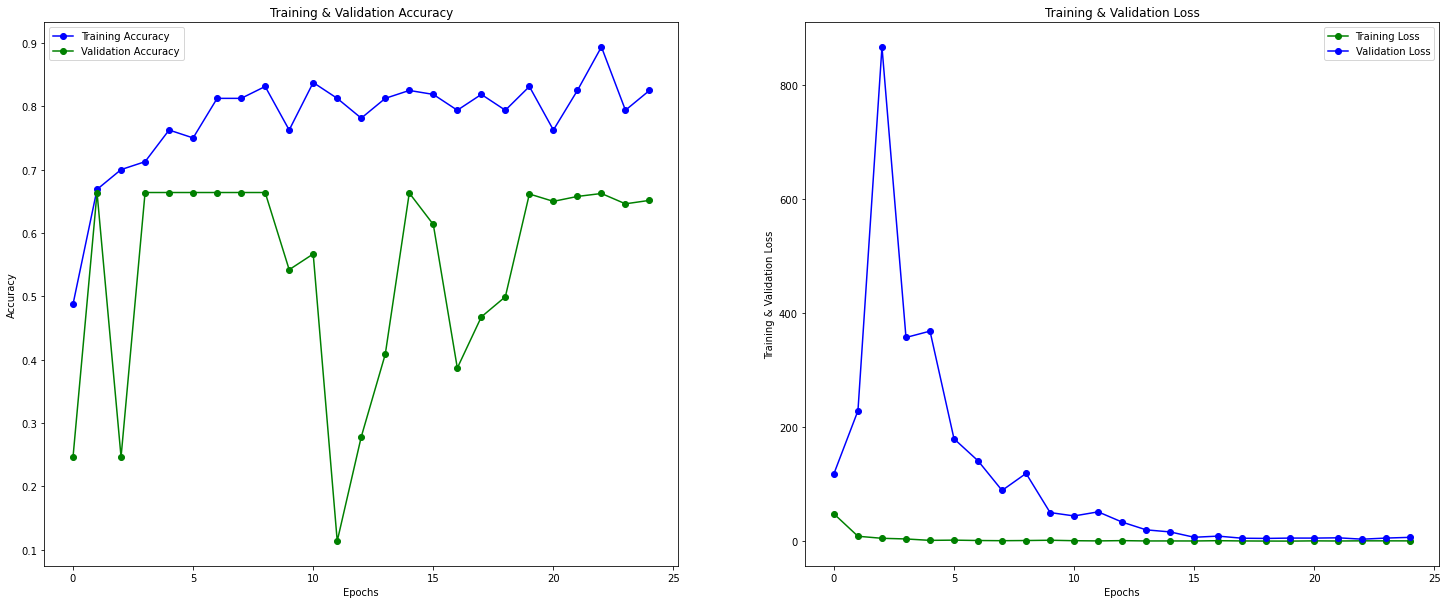

In [25]:
epochs=25
plot_losses_and_accuracies(train_model,epochs)

In [26]:
scores = model.evaluate_generator(test_generator)

In [27]:
print("Accuracy obtained on test data is: ",scores[1])

Accuracy obtained on test data is:  0.6513975262641907


# Model Building - Inception(GoogleNet)

In [28]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(250,250, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 29, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 27, 128)      

In [29]:
#supress the warnings
import warnings
warnings.filterwarnings('ignore')

import time
t = time.time()
train_model1 = model.fit_generator(train_generator,steps_per_epoch=5,epochs=25,validation_data=test_generator)
print('Training time: ' , (time.time()-t))

Epoch 1/25
5/5 [==============================] - 83s 19s/step - loss: 1.3536 - accuracy: 0.5724 - val_loss: 0.8135 - val_accuracy: 0.6638
Epoch 2/25
5/5 [==============================] - 74s 17s/step - loss: 0.7422 - accuracy: 0.7063 - val_loss: 0.8794 - val_accuracy: 0.6351
Epoch 3/25
5/5 [==============================] - 76s 18s/step - loss: 0.4726 - accuracy: 0.7875 - val_loss: 0.7767 - val_accuracy: 0.6638
Epoch 4/25
5/5 [==============================] - 73s 17s/step - loss: 0.6080 - accuracy: 0.8000 - val_loss: 0.7602 - val_accuracy: 0.7096
Epoch 5/25
5/5 [==============================] - 75s 18s/step - loss: 0.3730 - accuracy: 0.8313 - val_loss: 0.7173 - val_accuracy: 0.6638
Epoch 6/25
5/5 [==============================] - 78s 19s/step - loss: 0.3820 - accuracy: 0.8687 - val_loss: 0.7806 - val_accuracy: 0.7834
Epoch 7/25
5/5 [==============================] - 72s 17s/step - loss: 0.2719 - accuracy: 0.9125 - val_loss: 0.7830 - val_accuracy: 0.6638
Epoch 8/25
5/5 [===========

In [30]:
def plot_losses_and_accuracies(train_model,x):
    epochs = [i for i in range(x)]
    fig , ax = plt.subplots(1,2)
    train_acc = train_model.history['accuracy']
    train_loss = train_model.history['loss']
    val_acc = train_model.history['val_accuracy']
    val_loss = train_model.history['val_loss']
    fig.set_size_inches(25,10)
    ax[0].plot(epochs , train_acc , 'bo-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'go-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'b-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

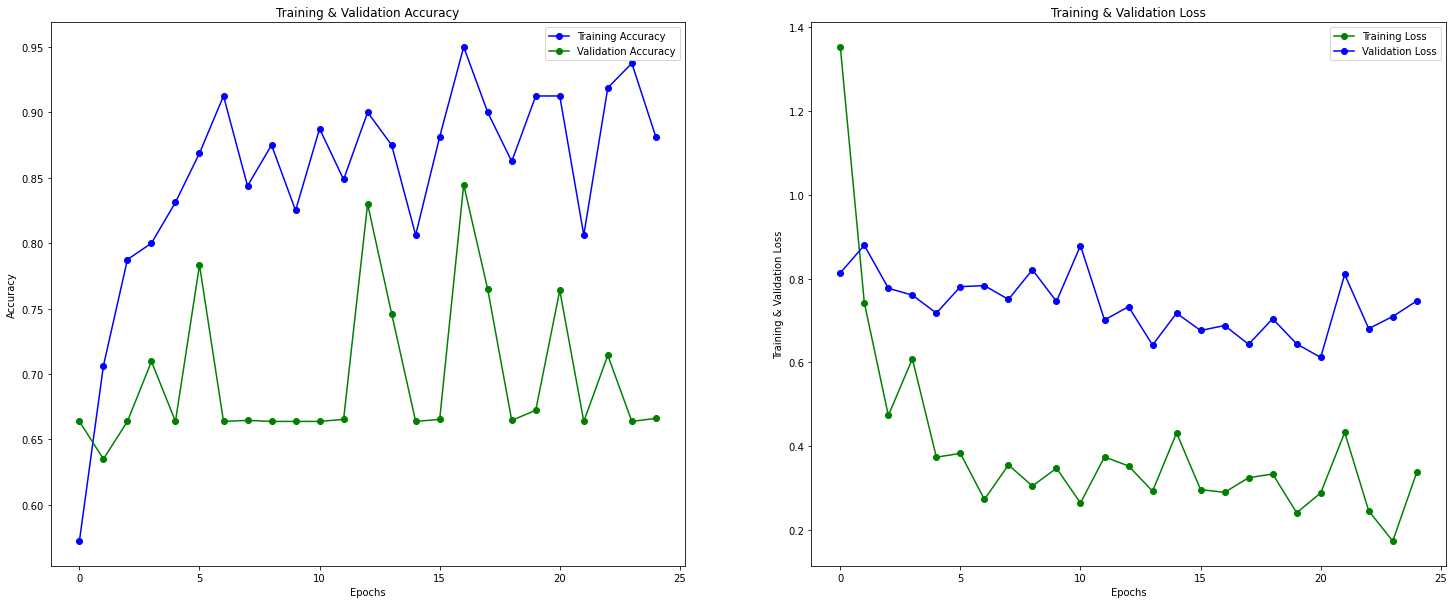

In [31]:
epochs=25
plot_losses_and_accuracies(train_model1,epochs)

In [32]:
scores = model.evaluate_generator(test_generator)

In [33]:
print("Accuracy obtained on test data is: ",scores[1])

Accuracy obtained on test data is:  0.6661490797996521


**Accuracy Obtained are:**
<ul>
    <li>Accuracy obtained in case of AlexNet is:   0.65 approx</li>
    <li>Accuracy Obtained in case of GoogleNet is: 0.67 approx</li>
<ul>

**We all know that, GoogleNet(also known as Inception) is best for Image Classification. Now it has been proven that with the results obtained above.**